In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
matplotlib.rc("font", family = "Malgun Gothic")
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_raw = pd.read_csv("유방암.csv")
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

### 데이터 셋을 부르고 결측치를 확인합니다.

In [4]:
df_y = df_raw_dummy["diagnosis"]
df_x = df_raw_dummy.drop("diagnosis", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data x size: {}".format(df_train_x.shape))
print("train data y size: {}".format(df_train_y.shape))
print("test data x size: {}".format(df_test_x.shape))
print("test data y size: {}".format(df_test_y.shape))

train data x size: (398, 30)
train data y size: (398,)
test data x size: (171, 30)
test data y size: (171,)


In [5]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 1.000
Scoring on test set: 0.930


In [6]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.877
1,2,0.960,0.924
2,3,0.977,0.936
3,4,0.990,0.942
4,5,0.992,0.953
5,6,0.995,0.936
6,7,0.997,0.959
7,8,1.000,0.930
8,9,1.000,0.930
9,10,1.000,0.930


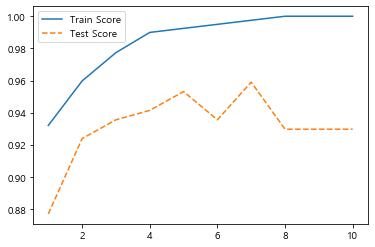

In [7]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

### depth는 7일 때 test accuracy가 최고이기 때문에 7을 선택합니다.

In [8]:
train_accuracy = []; test_accuracy = []
para_split = [n_split*10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth = 7,
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.970,0.936
1,20,0.962,0.918
2,30,0.962,0.918
3,40,0.962,0.918
4,50,0.962,0.918
5,60,0.962,0.918
6,70,0.962,0.918
7,80,0.962,0.918
8,90,0.962,0.918
9,100,0.962,0.918


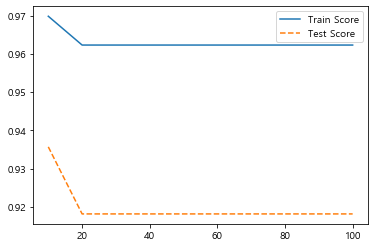

In [9]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

### split의 경우 20이후로 부터 일정한 모습을 보이기 때문에 최대값인 10을 선택합니다.

In [10]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf*2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(max_depth = 7, random_state = 1234,
                                 min_samples_leaf = v_min_samples_leaf,
                                 min_samples_split = 10)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.972,0.918
1,4,0.970,0.947
2,6,0.965,0.924
3,8,0.960,0.924
4,10,0.955,0.895
5,12,0.955,0.895
6,14,0.955,0.895
7,16,0.955,0.895
8,18,0.952,0.895
9,20,0.940,0.877


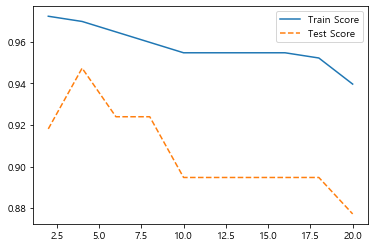

In [11]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

### leaf의 경우 훈련과 테스트모두 시간이 지날수록 낮아지는 모습을 보여주기 때문에 그 중 가장 최대값인 4를 선택합니다.

In [12]:
tree_final = DecisionTreeClassifier(random_state = 1234, max_depth = 7, min_samples_split = 10, min_samples_leaf = 4)
tree_final.fit(df_train_x, df_train_y)
y_pred = tree_final.predict(df_test_x)
print("Accuracy on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Accuracy: {0:.3f}".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.970
Accuracy: 0.947
Confusion Matrix: 
[[99  6]
 [ 3 63]]


### 최종결과 accuracy는 94.7%이고 confusion matrix는 위와 같습니다.

In [16]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 1.000
Scoring on test set: 0.936


In [17]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree*10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,1.0,0.942
1,20,1.0,0.936
2,30,1.0,0.936
3,40,1.0,0.936
4,50,1.0,0.936
5,60,1.0,0.942
6,70,1.0,0.936
7,80,1.0,0.936
8,90,1.0,0.936
9,100,1.0,0.936


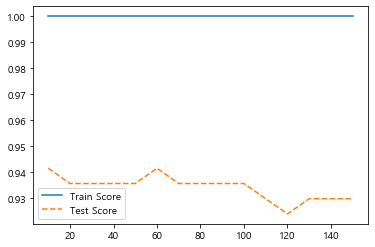

In [18]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

In [19]:
oob_error = []

for v_n_estimator in range(1, 151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

C:\Users\cptas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\cptas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\cptas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\cptas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\cptas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probab

Text(0.5, 0, 'n_estimators')

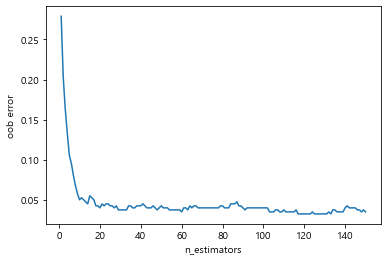

In [20]:
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

### estimators의 경우 obb_error가 낮을 수록 좋기 때문에 60을 선택합니다.

In [21]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators = 60, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.918
1,2,0.972,0.912
2,3,0.985,0.918
3,4,0.995,0.930
4,5,0.997,0.930
5,6,1.000,0.942
6,7,1.000,0.942
7,8,1.000,0.942
8,9,1.000,0.942
9,10,1.000,0.942


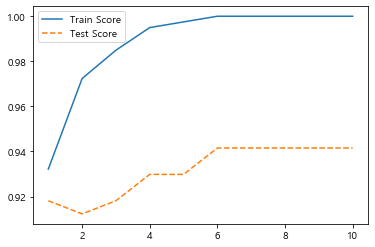

In [22]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

### depth는 6부터 일정한 흐름을 보여주기 때문에 훈련과 테스트의 최대값을 갖는 6을 선택합니다.

In [23]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth = 6, n_estimators = 60, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.997,0.936
1,20,0.982,0.930
2,30,0.982,0.918
3,40,0.982,0.930
4,50,0.980,0.930
5,60,0.977,0.924
6,70,0.977,0.930
7,80,0.972,0.924
8,90,0.975,0.924
9,100,0.972,0.924


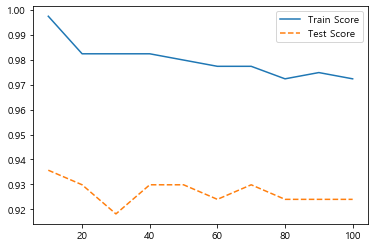

In [24]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

### split의 경우 10일 때 훈련과 테스트가 최대이기 때문에 10을 선택합니다.

In [25]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_split in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 6, n_estimators = 60, min_samples_split = 10, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.965,0.912
1,20,0.965,0.912
2,30,0.965,0.912
3,40,0.965,0.912
4,50,0.965,0.912
5,60,0.965,0.912
6,70,0.965,0.912
7,80,0.965,0.912
8,90,0.965,0.912
9,100,0.965,0.912


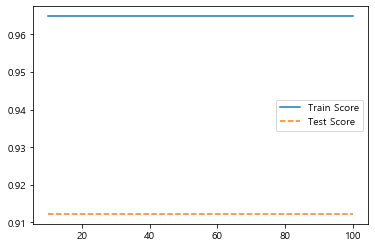

In [26]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

### leaf의 경우 처음부터 끝까지 일정한 모습을 보여주기 때문에 10을 선택합니다.

In [27]:
rf_final = RandomForestClassifier(random_state = 1234, n_estimators = 60, max_depth = 6, min_samples_leaf = 10, min_samples_split = 10)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.972
Accuracy on test set: 0.930
Confusion matrix: 
[[101   4]
 [  8  58]]


### 최종 결과 accuracy는 93%이고 confusion matrix는 위와 같습니다.